<h1>Analysis of Sensor Noise</h1>
<p>This section analyses the noise from the sensors by using the results from the callibration tests to establish
whether it is Gaussian or not. White Gaussian noise is assumed by the Kalman Filter. As a result this analysis will determine whether the Kalman Filter is a suitable technique with the designated sensor</p> 


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scy
import scipy.stats as stats
from pandas import DataFrame, Series
%matplotlib inline

In [41]:
# import data sets
left_sharp_df = pd.read_csv("LeftIRReadings.csv")
right_sharp_df = pd.read_csv("RightIRReadings.csv")
left_sharp_df.head()


,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,3,523,512,385,321,238,192,152,149,157,108,100,89,77,72,61,47,35
1,3,549,537,392,298,231,198,168,165,126,108,101,93,81,95,63,63,16
2,3,543,512,385,288,241,195,160,173,130,109,107,88,80,69,55,22,40
3,0,523,537,392,297,239,202,162,152,124,96,96,95,86,74,79,43,36
4,3,536,508,394,297,244,195,182,150,143,109,111,89,85,78,63,41,31


In [42]:
left_sharp_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,4.630000,524.360000,521.610000,396.590000,297.800000,238.16000,196.640000,167.520000,145.430000,127.440000,111.260000,101.620000,89.660000,82.73000,74.590000,58.960000,42.020000,34.960000
std,5.096354,10.878131,16.027057,12.216147,7.247431,9.85626,8.190312,8.677709,9.386488,7.437714,7.662871,9.550271,7.214212,6.77168,10.182273,8.820225,9.695339,7.023654
min,0.000000,512.000000,505.000000,373.000000,284.000000,220.00000,168.000000,148.000000,128.000000,108.000000,90.000000,80.000000,68.000000,64.00000,48.000000,20.000000,0.000000,12.000000
25%,3.000000,517.000000,508.000000,386.750000,294.000000,232.75000,193.000000,163.000000,142.000000,124.000000,109.000000,97.000000,88.000000,80.00000,71.000000,55.000000,39.000000,32.000000
50%,3.000000,522.000000,513.000000,392.000000,297.000000,236.00000,195.000000,166.000000,144.000000,126.000000,110.000000,101.000000,89.500000,81.00000,73.000000,59.000000,41.000000,36.000000
75%,5.000000,523.250000,534.500000,404.000000,298.250000,240.00000,198.000000,168.000000,147.000000,129.000000,114.000000,103.000000,93.000000,85.00000,77.250000,61.000000,44.250000,38.000000
max,27.000000,571.000000,571.000000,432.000000,326.000000,291.00000,222.000000,195.000000,173.000000,157.000000,135.000000,131.000000,113.000000,111.00000,119.000000,85.000000,71.000000,59.000000


(array([  6.,  13.,   3.,   4.,   2.,   0.,   9.,  11.,   3.,   2.,   1.,
          2.,   0.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   1.,   3.,   1.,   4.,   3.,   0.,   1.,   5.,
          5.,   4.,   2.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.]),
 array([505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
        518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530,
        531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543,
        544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556,
        557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569,
        570, 571], dtype=int64),
 <a list of 66 Patch objects>)

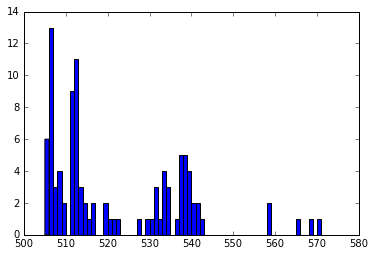

In [43]:
plt.hist(left_sharp_df["20"],bins=np.arange(left_sharp_df["20"].min(), left_sharp_df["20"].max() + 1))

NormaltestResult(statistic=14.079871450609414, pvalue=0.00087618287683585098)

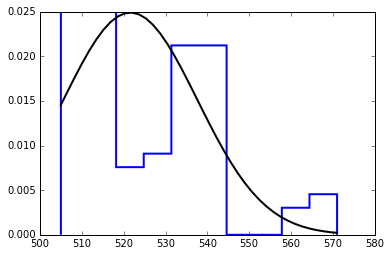

In [44]:
individual_bins = np.arange(left_sharp_df["20"].min(), left_sharp_df["20"].max() + 1 )
#plt.hist(left_sharp_df["100"], bins=50,histtype='step',normed=True)
norm = stats.norm(Series.mean(left_sharp_df["20"]), Series.std(left_sharp_df["20"]))
plt.hist(left_sharp_df["20"], normed=True,histtype='step',lw=2)
xs = np.linspace(left_sharp_df["20"].min(),left_sharp_df["20"].max(),num=40)
plt.plot(xs, norm.pdf(xs), color='k', lw=2)
data = np.array(left_sharp_df["20"])
stats.normaltest(data)

In [45]:
# convert values in table to distances using derived functions
# equation for left IR sensor distance = (1/(0.0000543636037657x + 0.00284159744082)) - 12
# equation for right IR sensor: distance = (1/(0.0000563710645179x + 0.00202946559052 )) - 12
def convert_leftIR_to_distance(a2d_reading):
    return (1/(0.0000543636037657 * a2d_reading + 0.00284159744082)) - 12
    
def convert_rightIR_to_distance(a2d_reading):
    return (1/(0.0000563710645179 * a2d_reading + 0.00202946559052 )) - 12

def subtract_true_distance(x,dist):
    return x - dist

# functions to get noise 

    
    
    
    

In [46]:
# create figure with probability density function plots for all distances
leftIR_distances_df = left_sharp_df # copy of array
for i in leftIR_distances_df:
     leftIR_distances_df[i] = leftIR_distances_df[i].map(convert_leftIR_to_distance)
    
leftIR_distances_df.head()
#leftIR_distances_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,320.813229,19.975686,20.599027,30.067031,37.279741,51.370813,63.304554,78.050620,79.392855,75.899081,102.772788,108.802742,118.209042,130.296192,136.021466,150.396260,173.298876,198.778204
1,320.813229,18.593000,19.216001,29.404215,40.515626,52.936794,61.499196,71.509518,72.662592,91.184144,102.772788,108.014573,114.623750,126.025285,112.904139,147.578598,147.578598,257.439007
2,320.813229,18.901361,20.599027,30.067031,42.058977,50.722563,62.390923,74.656809,69.655977,88.919723,102.061108,103.493405,119.137315,127.068795,139.683242,159.479653,235.672085,187.356414
3,339.914731,19.975686,19.216001,29.404215,40.665984,51.153246,60.342959,73.847954,78.050620,92.354893,112.061730,112.061730,112.904139,121.034142,133.676947,128.128203,181.078804,196.390329
4,320.813229,19.269065,20.831764,29.218659,40.665984,50.087442,62.390923,66.518985,78.941019,82.201051,102.061108,100.663902,118.209042,122.003283,129.203877,147.578598,185.219007,208.903226


In [47]:
leftIR_noise_df = leftIR_distances_df
actual_distances = range(0,180,10)
for i in actual_distances:
    df_index = str(i)
    leftIR_noise_df[df_index] = np.array(leftIR_noise_df[df_index] - i)
    

    


In [48]:
leftIR_noise_df

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,320.813229,9.975686,0.599027,0.067031,-2.720259,1.370813,3.304554,8.050620,-0.607145,-14.100919,2.772788,-1.197258,-1.790958,0.296192,-3.978534,0.396260,13.298876,28.778204
1,320.813229,8.593000,-0.783999,-0.595785,0.515626,2.936794,1.499196,1.509518,-7.337408,1.184144,2.772788,-1.985427,-5.376250,-3.974715,-27.095861,-2.421402,-12.421402,87.439007
2,320.813229,8.901361,0.599027,0.067031,2.058977,0.722563,2.390923,4.656809,-10.344023,-1.080277,2.061108,-6.506595,-0.862685,-2.931205,-0.316758,9.479653,75.672085,17.356414
3,339.914731,9.975686,-0.783999,-0.595785,0.665984,1.153246,0.342959,3.847954,-1.949380,2.354893,12.061730,2.061730,-7.095861,-8.965858,-6.323053,-21.871797,21.078804,26.390329
4,320.813229,9.269065,0.831764,-0.781341,0.665984,0.087442,2.390923,-3.481015,-1.058981,-7.798949,2.061108,-9.336098,-1.790958,-7.996717,-10.796123,-2.421402,25.219007,38.903226
5,309.190671,10.369565,-0.730935,-1.417894,0.515626,1.589885,-1.595267,-0.344023,1.721095,1.184144,2.772788,-1.985427,-3.608628,-7.013353,31.450881,21.450881,27.356414,26.390329
6,232.381646,9.163117,0.483891,-0.408550,2.702019,0.297715,2.692994,7.177488,-4.933020,0.039372,2.061108,-5.037869,-19.336098,-5.002682,-10.796123,0.396260,27.356414,-0.360618
7,326.945750,10.256042,-2.344119,-1.056579,1.122269,1.153246,1.206686,4.656809,3.175863,1.766216,1.358200,-19.391435,-5.376250,-5.002682,0.944429,9.479653,23.126947,33.721974
8,314.898676,8.901361,-0.942116,-0.124500,0.069659,1.153246,2.091286,3.054059,0.775708,0.608565,0.663902,-1.197258,-3.608628,-3.974715,-23.608628,-2.421402,36.390329,17.356414
9,320.813229,10.031367,-0.836883,-0.873497,0.665984,-2.135234,0.059561,3.847954,1.246005,2.354893,2.061108,14.997318,-0.862685,-2.931205,-3.978534,3.315213,17.108857,24.055952


In [49]:
leftIR_noise_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,313.394753,9.911127,0.077282,-0.989866,0.567182,1.404366,1.978853,1.815859,1.244160,0.522256,0.727601,-2.029999,-2.057969,-5.418692,-6.123252,4.487724,25.383033,30.339111
std,24.065070,0.581487,0.873803,1.088535,1.052266,2.043556,2.402778,3.178150,4.289483,4.037555,5.257741,7.186228,6.770179,6.579107,11.201965,14.572343,23.686490,18.658580
min,220.050072,7.513138,-2.486862,-4.015711,-3.371641,-8.413470,-4.932347,-7.609077,-10.344023,-14.100919,-13.774772,-21.630938,-20.699488,-29.336098,-44.598608,-27.996717,-22.777746,-16.684787
25%,309.190671,9.961814,-0.650931,-1.684724,0.478251,0.937168,1.499196,1.509518,0.310130,-0.523541,-1.368884,-3.531307,-5.376250,-7.996717,-9.976887,0.396260,18.582123,21.773295
50%,320.813229,10.031367,0.541357,-0.595785,0.665984,1.810476,2.390923,2.274712,1.721095,1.184144,1.358200,-1.985427,-2.248569,-3.974715,-5.160152,3.315213,25.219007,26.390329
75%,320.813229,10.312704,0.831764,-0.100614,1.122269,2.538237,2.997527,3.449162,2.685948,2.354893,2.061108,1.230609,-0.862685,-2.931205,-2.777746,9.479653,29.540658,36.281858
max,339.914731,10.599027,1.008511,1.254051,2.702019,5.560308,11.509518,9.849203,10.039372,12.772788,17.293819,17.068795,20.944429,16.206118,31.450881,92.526142,179.914731,104.208143


(array([ 0.14304626,  0.        ,  0.14304626,  0.        ,  0.14304626,
         0.        ,  0.        ,  0.        ,  0.28609253,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.14304626,  0.28609253,  0.85827758,  0.71523132,  0.71523132,
         0.14304626,  0.42913879,  0.57218505,  0.57218505,  0.14304626,
         0.14304626,  0.        ,  0.14304626,  0.        ,  0.        ,
         0.        ,  0.28609253,  0.14304626,  0.28609253,  0.        ,
         0.28609253,  0.14304626,  0.28609253,  0.42913879,  2.86092526,
         0.        ,  0.28609253,  0.57218505,  0.42913879,  2.717879  ]),
 array([-2.48686217, -2.41695472, -2.34704726, -2.27713981, -2.20723236,
        -2.1373249 , -2.06741745, -1.99751   , -1.92760254, -1.85769509,
        -1.78778764, -1.71788018, -1.64797273, -1.57806527, -1.50815782,
        -1.43825037, -1.36834291, -1.29843546, -1

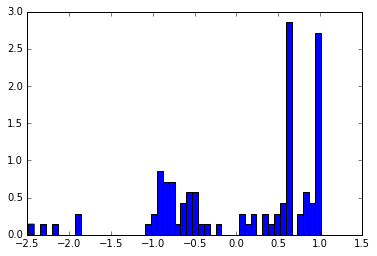

In [50]:
leftIR_noise_df
plt.hist(leftIR_noise_df["20"],bins=50,normed=True)

(array([ 0.28464281,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.09488094,  0.09488094,  0.        ,  0.        ,
         0.09488094,  0.09488094,  0.18976187,  0.37952375,  0.09488094,
         0.09488094,  0.09488094,  0.        ,  0.        ,  0.28464281,
         0.18976187,  0.28464281,  0.47440468,  0.18976187,  0.18976187,
         0.09488094,  0.18976187,  0.        ,  0.47440468,  0.09488094,
         0.37952375,  0.28464281,  0.37952375,  0.47440468,  0.75904749,
         0.66416656,  0.18976187,  1.0436903 ,  0.66416656,  0.47440468,
         0.        ,  0.        ,  0.        ,  0.09488094,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.09488094]),
 array([-4.01571114, -3.91031589, -3.80492064, -3.69952539, -3.59413015,
        -3.4887349 , -3.38333965, -3.2779444 , -3.17254915, -3.0671539 ,
        -2.96175865, -2.8563634 , -2.75096815, -2.6455729 , -2.54017765,
        -2.4347824 , -2.32938715, -2.2239919 , -2

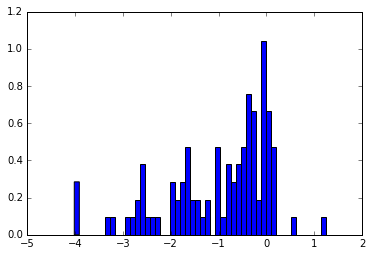

In [51]:
 plt.hist(leftIR_noise_df["30"],bins=50,normed=True)

(array([ 0.08232268,  0.        ,  0.        ,  0.        ,  0.        ,
         0.16464536,  0.08232268,  0.        ,  0.08232268,  0.        ,
         0.        ,  0.08232268,  0.        ,  0.        ,  0.        ,
         0.08232268,  0.        ,  0.        ,  0.08232268,  0.        ,
         0.        ,  0.16464536,  0.08232268,  0.08232268,  0.        ,
         0.08232268,  0.        ,  0.        ,  0.24696804,  0.08232268,
         0.65858145,  0.        ,  1.48180827,  0.98787218,  0.16464536,
         1.23484022,  1.48180827,  0.        ,  0.        ,  0.08232268,
         0.        ,  0.        ,  0.        ,  0.16464536,  0.41161341,
         0.        ,  0.        ,  0.        ,  0.        ,  0.16464536]),
 array([-3.37164131, -3.25016811, -3.1286949 , -3.0072217 , -2.88574849,
        -2.76427529, -2.64280208, -2.52132888, -2.39985567, -2.27838247,
        -2.15690926, -2.03543606, -1.91396285, -1.79248965, -1.67101644,
        -1.54954323, -1.42807003, -1.30659682, -1

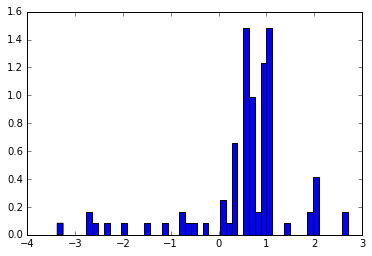

In [52]:
plt.hist(leftIR_noise_df["40"],bins=50,normed=True)

(array([ 0.0357813 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.0357813 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.28625043,  0.0357813 ,  0.        ,
         0.        ,  0.0357813 ,  0.07156261,  0.0357813 ,  0.0357813 ,
         0.07156261,  0.14312521,  0.07156261,  0.14312521,  0.42937564,
         0.32203173,  0.25046913,  0.46515695,  0.21468782,  0.32203173,
         0.17890652,  0.        ,  0.        ,  0.10734391,  0.        ,
         0.        ,  0.21468782,  0.        ,  0.        ,  0.07156261]),
 array([-8.41346999, -8.13399443, -7.85451886, -7.5750433 , -7.29556774,
        -7.01609217, -6.73661661, -6.45714105, -6.17766548, -5.89818992,
        -5.61871436, -5.33923879, -5.05976323, -4.78028767, -4.5008121 ,
        -4.22133654, -3.94186098, -3.66238541, -3

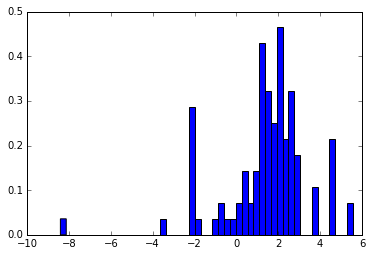

In [53]:
plt.hist(leftIR_noise_df["50"],bins=50,normed=True)

(array([ 0.06082035,  0.        ,  0.03041017,  0.06082035,  0.        ,
         0.03041017,  0.        ,  0.        ,  0.        ,  0.03041017,
         0.03041017,  0.1216407 ,  0.03041017,  0.        ,  0.06082035,
         0.09123052,  0.06082035,  0.        ,  0.1216407 ,  0.15205087,
         0.06082035,  0.3649221 ,  0.45615262,  0.2432814 ,  0.4865628 ,
         0.3649221 ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.03041017,  0.        ,  0.03041017,  0.        ,  0.        ,
         0.        ,  0.06082035,  0.03041017,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.03041017]),
 array([ -4.93234691e+00,  -4.60350960e+00,  -4.27467230e+00,
         -3.94583499e+00,  -3.61699768e+00,  -3.28816038e+00,
         -2.95932307e+00,  -2.63048576e+00,  -2.30164846e+00,
         -1.97281115e+00,  -1.64397384e+00,  -1.31513654e+00,
         -9.86299230

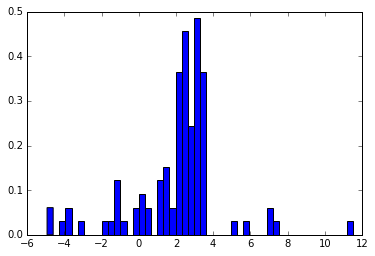

In [54]:
plt.hist(leftIR_noise_df["60"],bins=50,normed=True)

(array([ 0.02863971,  0.        ,  0.        ,  0.11455883,  0.02863971,
         0.        ,  0.        ,  0.02863971,  0.        ,  0.        ,
         0.05727941,  0.02863971,  0.02863971,  0.        ,  0.02863971,
         0.        ,  0.        ,  0.        ,  0.02863971,  0.05727941,
         0.02863971,  0.02863971,  0.08591912,  0.        ,  0.        ,
         0.08591912,  0.4295956 ,  0.25775736,  0.20047795,  0.25775736,
         0.22911765,  0.14319853,  0.34367648,  0.11455883,  0.        ,
         0.08591912,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.02863971,  0.        ,  0.05727941,
         0.        ,  0.        ,  0.        ,  0.02863971,  0.02863971]),
 array([-7.60907666, -7.25991108, -6.91074549, -6.56157991, -6.21241432,
        -5.86324874, -5.51408315, -5.16491757, -4.81575198, -4.4665864 ,
        -4.11742081, -3.76825523, -3.41908964, -3.06992406, -2.72075847,
        -2.37159289, -2.0224273 , -1.67326172, -1

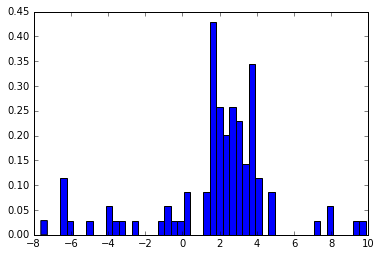

In [55]:
plt.hist(leftIR_noise_df["70"],bins=50,normed=True)

(array([ 0.02452977,  0.        ,  0.04905954,  0.07358931,  0.        ,
         0.02452977,  0.        ,  0.02452977,  0.        ,  0.02452977,
         0.        ,  0.        ,  0.        ,  0.04905954,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.04905954,
         0.04905954,  0.07358931,  0.02452977,  0.07358931,  0.        ,
         0.02452977,  0.14717863,  0.07358931,  0.07358931,  0.53965496,
         0.29435725,  0.36794657,  0.        ,  0.12264886,  0.        ,
         0.02452977,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02452977,  0.        ,
         0.        ,  0.        ,  0.02452977,  0.04905954,  0.14717863]),
 array([-10.34402261,  -9.93635472,  -9.52868683,  -9.12101894,
         -8.71335105,  -8.30568315,  -7.89801526,  -7.49034737,
         -7.08267948,  -6.67501159,  -6.2673437 ,  -5.85967581,
         -5.45200792,  -5.04434003,  -4.63667214,  -4.22900425,
         -3.

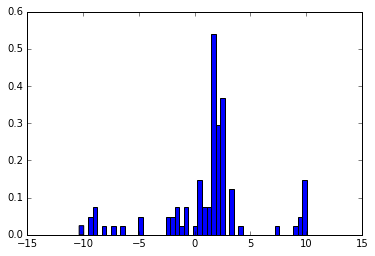

In [56]:
plt.hist(leftIR_noise_df["80"],bins=50,normed=True)

(array([ 0.01860555,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.05581664,  0.        ,  0.        ,  0.01860555,
         0.        ,  0.07442218,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.01860555,  0.01860555,
         0.        ,  0.03721109,  0.01860555,  0.07442218,  0.09302773,
         0.07442218,  0.01860555,  0.20466101,  0.31629428,  0.2418721 ,
         0.2418721 ,  0.16744991,  0.01860555,  0.01860555,  0.        ,
         0.03721109,  0.03721109,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.03721109,
         0.        ,  0.        ,  0.        ,  0.        ,  0.01860555]),
 array([-14.10091908, -13.56344493, -13.02597078, -12.48849663,
        -11.95102248, -11.41354833, -10.87607418, -10.33860004,
         -9.80112589,  -9.26365174,  -8.72617759,  -8.18870344,
         -7.65122929,  -7.11375514,  -6.57628099,  -6.03880684,
         -5.

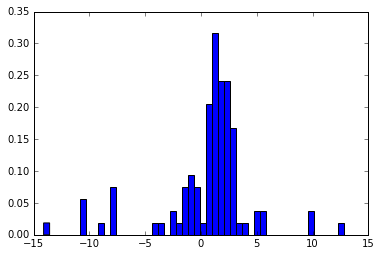

In [57]:
plt.hist(leftIR_noise_df["90"],bins=50,normed=True)

(array([ 0.01609342,  0.03218685,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.08046712,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.06437369,
         0.        ,  0.04828027,  0.03218685,  0.04828027,  0.11265397,
         0.        ,  0.12874739,  0.03218685,  0.12874739,  0.24140135,
         0.25749478,  0.16093424,  0.08046712,  0.        ,  0.        ,
         0.01609342,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.09656054,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.01609342,  0.        ,  0.01609342]),
 array([-13.77477221, -13.15340038, -12.53202856, -11.91065674,
        -11.28928491, -10.66791309, -10.04654127,  -9.42516944,
         -8.80379762,  -8.1824258 ,  -7.56105397,  -6.93968215,
         -6.31831033,  -5.6969385 ,  -5.07556668,  -4.45419486,
         -3.

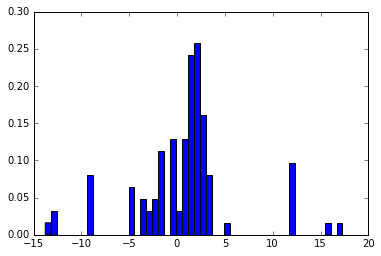

In [58]:
plt.hist(leftIR_noise_df["100"],bins=50,normed=True)

(array([ 0.01291999,  0.        ,  0.02583997,  0.        ,  0.02583997,
         0.02583997,  0.        ,  0.        ,  0.        ,  0.05167994,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01291999,  0.01291999,  0.01291999,  0.        ,  0.01291999,
         0.01291999,  0.03875996,  0.06459993,  0.11627987,  0.15503983,
         0.0904399 ,  0.0904399 ,  0.06459993,  0.06459993,  0.10335989,
         0.16795981,  0.02583997,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.01291999,
         0.        ,  0.        ,  0.01291999,  0.01291999,  0.02583997,
         0.        ,  0.        ,  0.02583997,  0.        ,  0.01291999]),
 array([-21.63093828, -20.85694362, -20.08294896, -19.3089543 ,
        -18.53495964, -17.76096497, -16.98697031, -16.21297565,
        -15.43898099, -14.66498633, -13.89099167, -13.116997  ,
        -12.34300234, -11.56900768, -10.79501302, -10.02101836,
         -9.

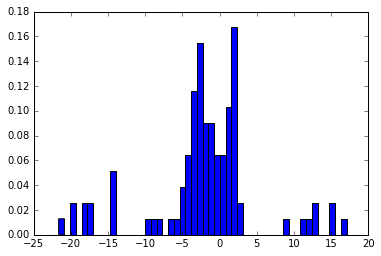

In [59]:
plt.hist(leftIR_noise_df["110"],bins=50,normed=True)

(array([ 0.01200656,  0.02401311,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.02401311,  0.        ,
         0.        ,  0.01200656,  0.        ,  0.        ,  0.02401311,
         0.02401311,  0.07203933,  0.06003278,  0.07203933,  0.03601967,
         0.09605244,  0.14407866,  0.18009833,  0.18009833,  0.03601967,
         0.        ,  0.02401311,  0.        ,  0.06003278,  0.        ,
         0.        ,  0.        ,  0.        ,  0.03601967,  0.01200656,
         0.01200656,  0.        ,  0.        ,  0.01200656,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.01200656,  0.        ,  0.02401311,  0.01200656]),
 array([-20.69948839, -19.86661005, -19.0337317 , -18.20085336,
        -17.36797501, -16.53509667, -15.70221832, -14.86933998,
        -14.03646163, -13.20358329, -12.37070494, -11.5378266 ,
        -10.70494825,  -9.87206991,  -9.03919156,  -8.20631322,
         -7.

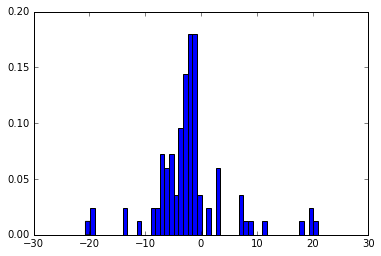

In [60]:
plt.hist(leftIR_noise_df["120"],bins=50,normed=True)

(array([ 0.01097882,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.02195765,  0.        ,  0.01097882,  0.        ,
         0.        ,  0.        ,  0.        ,  0.0439153 ,  0.        ,
         0.        ,  0.        ,  0.01097882,  0.        ,  0.02195765,
         0.03293647,  0.0439153 ,  0.06587295,  0.05489412,  0.05489412,
         0.03293647,  0.0878306 ,  0.19761884,  0.18664002,  0.        ,
         0.03293647,  0.0439153 ,  0.0439153 ,  0.0439153 ,  0.01097882,
         0.        ,  0.01097882,  0.        ,  0.01097882,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.02195765]),
 array([-29.33609815, -28.42525383, -27.51440951, -26.60356519,
        -25.69272087, -24.78187656, -23.87103224, -22.96018792,
        -22.0493436 , -21.13849929, -20.22765497, -19.31681065,
        -18.40596633, -17.49512201, -16.5842777 , -15.67343338,
        -14.

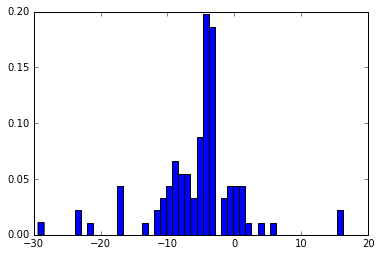

In [61]:
plt.hist(leftIR_noise_df["130"],bins=50,normed=True)

In [62]:
test_arr = [1,2,3]
test_arr[1:] + [1]*2

[2, 3, 1, 1]

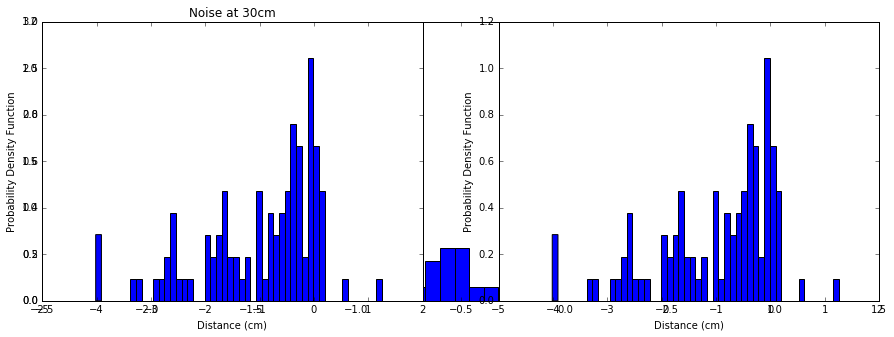

In [63]:
fig = plt.figure(figsize=(15,5))
plt.hist(leftIR_noise_df["20"],bins = 50,normed=True)
ax1 = fig.add_subplot(1,2,1)
ax1.hist(leftIR_noise_df["30"],bins = 50,normed=True)
ax1.set_title("Noise at 20cm") 
ax1.set_xlabel("Distance (cm)")
ax1.set_ylabel("Probability Density Function")

ax2 = fig.add_subplot(1,2,2)
ax2.hist(leftIR_noise_df["30"],bins = 50,normed=True)
ax1.set_title("Noise at 30cm")
ax2.set_xlabel("Distance (cm)")
ax2.set_ylabel("Probability Density Function")

fig.tight_layout

plt.show()




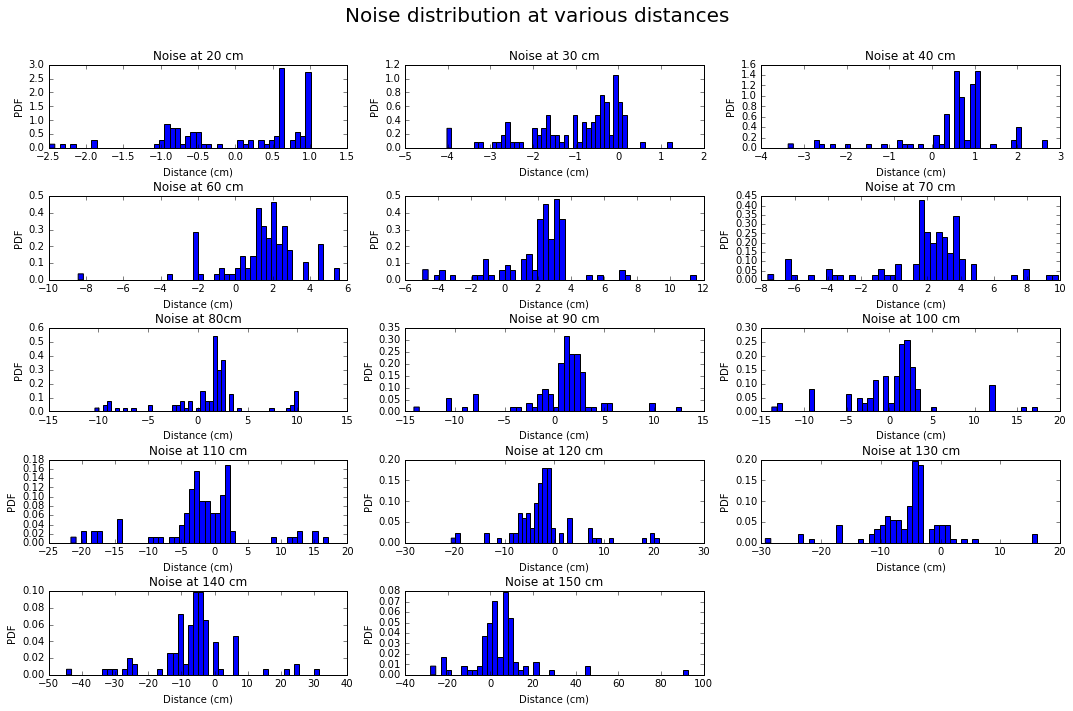

In [64]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("Noise distribution at various distances",fontsize=20)

ax1 = plt.subplot2grid((5,3),(0,0),rowspan=1,colspan=1)
ax1.hist(leftIR_noise_df["20"],bins = 50,normed=True)
ax1.set_title("Noise at 20 cm") 
ax1.set_xlabel("Distance (cm)")
ax1.set_ylabel("PDF")

ax2 = plt.subplot2grid((5,3),(0,1))
ax2.hist(leftIR_noise_df["30"],bins = 50,normed=True)
ax2.set_title("Noise at 30 cm")
ax2.set_xlabel("Distance (cm)")
ax2.set_ylabel("PDF")

ax3 = plt.subplot2grid((5,3),(0,2))
ax3.hist(leftIR_noise_df["40"],bins = 50,normed=True)
ax3.set_title("Noise at 40 cm")
ax3.set_xlabel("Distance (cm)")
ax3.set_ylabel("PDF")

ax4 = plt.subplot2grid((5,3),(1,0))
ax4.hist(leftIR_noise_df["50"],bins = 50,normed=True)
ax4.set_title("Noise at 50 cm")
ax4.set_xlabel("Distance (cm)")
ax4.set_ylabel("PDF")

ax5 = plt.subplot2grid((5,3),(1,1))
ax5.hist(leftIR_noise_df["60"],bins = 50,normed=True)
ax4.set_title("Noise at 60 cm")
ax5.set_xlabel("Distance (cm)")
ax5.set_ylabel("PDF")

ax6 = plt.subplot2grid((5,3),(1,2))
ax6.hist(leftIR_noise_df["70"],bins = 50,normed=True)
ax6.set_title("Noise at 70 cm")
ax6.set_xlabel("Distance (cm)")
ax6.set_ylabel("PDF")

ax7 = plt.subplot2grid((5,3),(2,0))
ax7.hist(leftIR_noise_df["80"],bins = 50,normed=True)
ax7.set_title("Noise at 80cm")
ax7.set_xlabel("Distance (cm)")
ax7.set_ylabel("PDF")

ax8 = plt.subplot2grid((5,3),(2,1))
ax8.hist(leftIR_noise_df["90"],bins = 50,normed=True)
ax8.set_title("Noise at 90 cm")
ax8.set_xlabel("Distance (cm)")
ax8.set_ylabel("PDF")

ax9 = plt.subplot2grid((5,3),(2,2))
ax9.hist(leftIR_noise_df["100"],bins = 50,normed=True)
ax9.set_title("Noise at 100 cm")
ax9.set_xlabel("Distance (cm)")
ax9.set_ylabel("PDF")

ax10 = plt.subplot2grid((5,3),(3,0))
ax10.hist(leftIR_noise_df["110"],bins = 50,normed=True)
ax10.set_title("Noise at 110 cm")
ax10.set_xlabel("Distance (cm)")
ax10.set_ylabel("PDF")

ax10 = plt.subplot2grid((5,3),(3,1))
ax10.hist(leftIR_noise_df["120"],bins = 50,normed=True)
ax10.set_title("Noise at 120 cm")
ax10.set_xlabel("Distance (cm)")
ax10.set_ylabel("PDF")

ax10 = plt.subplot2grid((5,3),(3,2))
ax10.hist(leftIR_noise_df["130"],bins = 50,normed=True)
ax10.set_title("Noise at 130 cm")
ax10.set_xlabel("Distance (cm)")
ax10.set_ylabel("PDF")

ax10 = plt.subplot2grid((5,3),(4,0))
ax10.hist(leftIR_noise_df["140"],bins = 50,normed=True)
ax10.set_title("Noise at 140 cm")
ax10.set_xlabel("Distance (cm)")
ax10.set_ylabel("PDF")

ax10 = plt.subplot2grid((5,3),(4,1))
ax10.hist(leftIR_noise_df["150"],bins = 50,normed=True)
ax10.set_title("Noise at 150 cm")
ax10.set_xlabel("Distance (cm)")
ax10.set_ylabel("PDF")







plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.savefig("noise_distribution.png")


In [65]:
leftIR_noise_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,313.394753,9.911127,0.077282,-0.989866,0.567182,1.404366,1.978853,1.815859,1.244160,0.522256,0.727601,-2.029999,-2.057969,-5.418692,-6.123252,4.487724,25.383033,30.339111
std,24.065070,0.581487,0.873803,1.088535,1.052266,2.043556,2.402778,3.178150,4.289483,4.037555,5.257741,7.186228,6.770179,6.579107,11.201965,14.572343,23.686490,18.658580
min,220.050072,7.513138,-2.486862,-4.015711,-3.371641,-8.413470,-4.932347,-7.609077,-10.344023,-14.100919,-13.774772,-21.630938,-20.699488,-29.336098,-44.598608,-27.996717,-22.777746,-16.684787
25%,309.190671,9.961814,-0.650931,-1.684724,0.478251,0.937168,1.499196,1.509518,0.310130,-0.523541,-1.368884,-3.531307,-5.376250,-7.996717,-9.976887,0.396260,18.582123,21.773295
50%,320.813229,10.031367,0.541357,-0.595785,0.665984,1.810476,2.390923,2.274712,1.721095,1.184144,1.358200,-1.985427,-2.248569,-3.974715,-5.160152,3.315213,25.219007,26.390329
75%,320.813229,10.312704,0.831764,-0.100614,1.122269,2.538237,2.997527,3.449162,2.685948,2.354893,2.061108,1.230609,-0.862685,-2.931205,-2.777746,9.479653,29.540658,36.281858
max,339.914731,10.599027,1.008511,1.254051,2.702019,5.560308,11.509518,9.849203,10.039372,12.772788,17.293819,17.068795,20.944429,16.206118,31.450881,92.526142,179.914731,104.208143


In [66]:
# create overall noise distribution
# concatenate all relevant columns into one big colums

def concatenate_cols(dataframe):
    distances = range(20,160,10)
    indexes = [str(x) for x in distances]
    x = pd.Series([])
    for i in indexes:
        x = x.append(dataframe[i]).reset_index(drop=True)
    
    return x



left_ir_noise = concatenate_cols(leftIR_noise_df)
left_ir_noise



0        0.599027
1       -0.783999
2        0.599027
3       -0.783999
4        0.831764
5       -0.730935
6        0.483891
7       -2.344119
8       -0.942116
9       -0.836883
10       0.949384
11       0.949384
12       0.949384
13       0.656901
14       0.599027
15      -0.783999
16       0.949384
17      -0.408723
18       0.949384
19      -0.462885
20       0.656901
21      -0.783999
22       0.656901
23      -0.354374
24       0.949384
25      -0.462885
26       0.599027
27       0.599027
28       0.541357
29       0.890469
          ...    
1370    -5.142956
1371    -7.773236
1372     3.315213
1373     4.814396
1374     6.341019
1375     7.895841
1376    -2.421402
1377     1.842737
1378     3.315213
1379     1.842737
1380     0.396260
1381   -27.996717
1382     7.895841
1383    -5.142956
1384     9.479653
1385    16.121632
1386     9.479653
1387     0.396260
1388    12.737548
1389     6.341019
1390   -10.316758
1391     9.479653
1392    46.390329
1393    -2.421402
1394     7

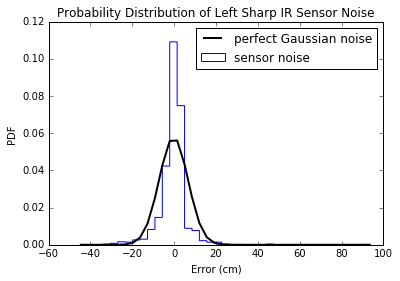

In [67]:
xs = np.linspace(left_ir_noise.min(),left_ir_noise.max() + 1, num=40)
overall_noise_plt = plt.hist(left_ir_noise,normed=True,bins=xs,histtype='step', label='sensor noise')
plt.xlabel('Error (cm)')
plt.ylabel('PDF')
#plt.axis([-20,35,0,0.12])
plt.title("Probability Distribution of Left Sharp IR Sensor Noise")

norm = stats.norm(left_ir_noise.mean(), left_ir_noise.std())
plt.plot(xs, norm.pdf(xs), color='k', lw=2, label='perfect Gaussian noise')

plt.legend()

plt.savefig("overall_noise_plt_left.png")


In [68]:
left_ir_noise.describe()

count    1400.000000
mean       -0.271035
std         6.897475
min       -44.598608
25%        -2.463001
50%         0.515626
75%         2.091286
max        92.526142
dtype: float64

In [69]:
right_sharp_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.740000,530.400000,516.930000,397.950000,303.170000,246.250000,201.550000,172.53000,150.540000,136.970000,124.970000,111.440000,102.560000,92.480000,83.590000,77.830000,69.840000,66.010000
std,6.780274,11.321741,11.601337,10.903966,9.433505,9.751845,9.356438,7.41205,8.797865,9.083735,9.830333,8.579186,9.608834,13.061997,12.650784,17.143515,16.007397,10.825984
min,0.000000,519.000000,505.000000,384.000000,288.000000,228.000000,184.000000,152.00000,132.000000,114.000000,100.000000,88.000000,72.000000,63.000000,48.000000,37.000000,32.000000,38.000000
25%,3.000000,522.000000,509.500000,390.000000,298.000000,240.000000,197.000000,170.00000,146.000000,134.000000,119.000000,107.000000,98.000000,87.000000,77.750000,69.000000,63.000000,62.750000
50%,3.000000,526.500000,513.000000,394.000000,302.000000,243.000000,200.000000,172.00000,149.000000,136.000000,124.000000,111.500000,101.000000,91.000000,82.000000,75.500000,69.500000,65.500000
75%,6.000000,532.250000,520.000000,401.000000,303.000000,245.250000,203.000000,175.00000,153.250000,141.000000,130.000000,115.250000,104.000000,98.250000,91.250000,83.000000,75.000000,71.000000
max,31.000000,558.000000,557.000000,440.000000,343.000000,279.000000,247.000000,197.00000,182.000000,175.000000,150.000000,135.000000,139.000000,138.000000,127.000000,127.000000,111.000000,95.000000


In [70]:
# process overall noise from right IR sensor
rightIR_distances_df = DataFrame.copy(right_sharp_df)
for i in rightIR_distances_df:
     rightIR_distances_df[i] = rightIR_distances_df[i].map(convert_rightIR_to_distance)
    
rightIR_distances_df.head()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,410.352236,19.176693,20.371416,29.063702,39.418840,51.811065,62.535528,73.285747,86.007796,87.102844,104.706418,107.860605,122.388953,123.414808,143.607908,142.254818,227.718127,155.351690
1,288.661448,17.965440,20.312452,29.158977,34.806091,52.273461,64.134990,73.697751,70.509026,72.073164,83.373205,103.943640,117.484315,112.925069,139.618026,122.388953,194.269826,163.636271
2,442.839284,18.638237,20.729770,29.350860,37.970430,52.273461,61.914404,73.697751,84.409859,88.792078,99.568461,111.190022,115.621257,114.709689,138.333148,108.675972,160.225921,160.225921
3,442.839284,19.734414,20.312452,29.642062,42.751523,52.273461,62.223667,73.285747,89.950595,101.713982,96.830617,110.340447,120.383177,126.588546,132.222139,152.252639,153.787683,160.225921
4,410.352236,19.791285,20.729770,29.254696,42.583058,51.582353,54.439967,72.877685,91.136054,96.167023,100.274582,106.262484,123.414808,104.706418,135.827636,137.069865,153.787683,150.745761


In [71]:
rightIR_distances_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,421.564982,19.331922,20.096425,28.903828,40.340689,50.921211,62.783498,73.173895,83.298908,90.829980,98.616594,108.727680,116.615487,127.475993,138.044406,147.381887,159.627806,163.938598
std,54.031576,0.612380,0.656616,0.991420,1.382226,2.076676,2.746215,2.989805,4.338260,5.264998,6.871101,7.185579,8.676243,14.148976,16.611192,24.436768,27.719773,19.742323
min,252.762594,17.864547,17.914908,25.267913,34.806091,44.315843,50.683669,64.134990,69.373591,72.073164,83.373205,91.739182,89.368027,89.950595,96.830617,96.830617,108.675972,123.414808
25%,410.352236,19.217859,19.905642,28.593868,40.328903,51.073847,62.223667,72.073164,81.735862,88.222638,94.863821,105.286078,114.709689,120.138026,127.406970,137.069865,147.813455,153.787683
50%,442.839284,19.536981,20.312452,29.254696,40.483721,51.582353,63.167180,73.285747,83.888730,91.136054,98.871166,108.268289,117.484315,127.679778,138.333148,147.100014,156.148588,162.775325
75%,442.839284,19.791285,20.519854,29.642062,41.112265,52.273461,64.134990,74.113756,85.469297,92.349406,102.447612,112.051479,120.383177,132.222139,143.952167,156.945487,167.184410,167.641504
max,480.740554,19.963129,20.790268,30.236946,42.751523,55.194961,68.633837,82.358607,93.591647,106.262484,118.436392,131.059075,152.252639,167.184410,199.180902,231.001852,248.869135,227.718127


In [72]:
# get error by subtracting true distances from readings
rightIR_noise_df = DataFrame.copy(rightIR_distances_df)
actual_distances = range(0,180,10)
for i in actual_distances:
    df_index = str(i)
    rightIR_noise_df[df_index] = np.array(rightIR_noise_df[df_index] - i)

rightIR_noise_df.head()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
0,410.352236,9.176693,0.371416,-0.936298,-0.581160,1.811065,2.535528,3.285747,6.007796,-2.897156,4.706418,-2.139395,2.388953,-6.585192,3.607908,-7.745182,67.718127,-14.648310
1,288.661448,7.965440,0.312452,-0.841023,-5.193909,2.273461,4.134990,3.697751,-9.490974,-17.926836,-16.626795,-6.056360,-2.515685,-17.074931,-0.381974,-27.611047,34.269826,-6.363729
2,442.839284,8.638237,0.729770,-0.649140,-2.029570,2.273461,1.914404,3.697751,4.409859,-1.207922,-0.431539,1.190022,-4.378743,-15.290311,-1.666852,-41.324028,0.225921,-9.774079
3,442.839284,9.734414,0.312452,-0.357938,2.751523,2.273461,2.223667,3.285747,9.950595,11.713982,-3.169383,0.340447,0.383177,-3.411454,-7.777861,2.252639,-6.212317,-9.774079
4,410.352236,9.791285,0.729770,-0.745304,2.583058,1.582353,-5.560033,2.877685,11.136054,6.167023,0.274582,-3.737516,3.414808,-25.293582,-4.172364,-12.930135,-6.212317,-19.254239


In [73]:
rightIR_noise_df.describe()

,0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,421.564982,9.331922,0.096425,-1.096172,0.340689,0.921211,2.783498,3.173895,3.298908,0.829980,-1.383406,-1.272320,-3.384513,-2.524007,-1.955594,-2.618113,-0.372194,-6.061402
std,54.031576,0.612380,0.656616,0.991420,1.382226,2.076676,2.746215,2.989805,4.338260,5.264998,6.871101,7.185579,8.676243,14.148976,16.611192,24.436768,27.719773,19.742323
min,252.762594,7.864547,-2.085092,-4.732087,-5.193909,-5.684157,-9.316331,-5.865010,-10.626409,-17.926836,-16.626795,-18.260818,-30.631973,-40.049405,-43.169383,-53.169383,-51.324028,-46.585192
25%,410.352236,9.217859,-0.094358,-1.406132,0.328903,1.073847,2.223667,2.073164,1.735862,-1.777362,-5.136179,-4.713922,-5.290311,-9.861974,-12.593030,-12.930135,-12.186545,-16.212317
50%,442.839284,9.536981,0.312452,-0.745304,0.483721,1.582353,3.167180,3.285747,3.888730,1.136054,-1.128834,-1.731711,-2.515685,-2.320222,-1.666852,-2.899986,-3.851412,-7.224675
75%,442.839284,9.791285,0.519854,-0.357938,1.112265,2.273461,4.134990,4.113756,5.469297,2.349406,2.447612,2.051479,0.383177,2.222139,3.952167,6.945487,7.184410,-2.358496
max,480.740554,9.963129,0.790268,0.236946,2.751523,5.194961,8.633837,12.358607,13.591647,16.262484,18.436392,21.059075,32.252639,37.184410,59.180902,81.001852,88.869135,57.718127


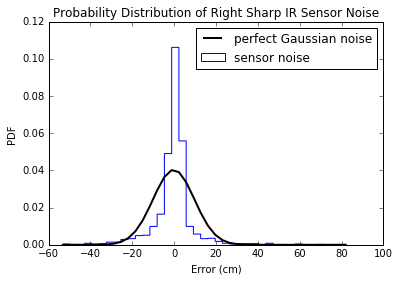

In [74]:
right_ir_noise = concatenate_cols(rightIR_noise_df)
xs = np.linspace(right_ir_noise.min(),right_ir_noise.max() + 1, num=40)
overall_noise_plt = plt.hist(right_ir_noise,normed=True,bins=xs,histtype='step', label='sensor noise')
plt.xlabel('Error (cm)')
plt.ylabel('PDF')
#plt.axis([-20,35,0,0.12])
plt.title("Probability Distribution of Right Sharp IR Sensor Noise")

norm = stats.norm(right_ir_noise.mean(), right_ir_noise.std())
plt.plot(xs, norm.pdf(xs), color='k', lw=2,label='perfect Gaussian noise')
plt.legend()
plt.savefig("overall_noise_plt_right.png")

In [75]:
left_ir_noise.describe()

count    1400.000000
mean       -0.271035
std         6.897475
min       -44.598608
25%        -2.463001
50%         0.515626
75%         2.091286
max        92.526142
dtype: float64

In [76]:
right_ir_noise.describe()

count    1400.000000
mean       -0.199251
std         9.888335
min       -53.169383
25%        -2.497597
50%         0.383177
75%         2.877685
max        81.001852
dtype: float64

In [77]:
(1/(0.0000543636037657 * 1023 + 0.00284159744082)) - 12

5.107011377168565